In [35]:
!pip install openpyxl

## Import libraries and dataset

In [36]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel('../input/greenhouse/green.xlsx')
df.head()

,state,production_based_emissions,production_based_emissions_excluding_land_use,consumption_based_emissions,production_based_emissions_including_land_use
0,China,11576.0,12700.0,8801.0,NaN
1,United States,5833.0,6570.0,5716.0,5903.0
2,European Union,3162.0,NaN,4166.0,3951.0
3,India,3235.0,2870.0,2217.0,NaN
4,Russia,2391.0,2670.0,1381.0,1630.0


In [38]:
df.corr()

,production_based_emissions,production_based_emissions_excluding_land_use,consumption_based_emissions,production_based_emissions_including_land_use
production_based_emissions,1.000000,0.997766,0.962734,0.985907
production_based_emissions_excluding_land_use,0.997766,1.000000,0.987854,0.985867
consumption_based_emissions,0.962734,0.987854,1.000000,0.996278
production_based_emissions_including_land_use,0.985907,0.985867,0.996278,1.000000


In [39]:
df = df.loc[(df.state!='European Union')&(df.production_based_emissions.notnull()),['state','production_based_emissions']]
df.head()

,state,production_based_emissions
0,China,11576.0
1,United States,5833.0
3,India,3235.0
4,Russia,2391.0
5,Japan,1264.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 79
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       53 non-null     object 
 1   production_based_emissions  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


## Extract Latitude and Longitude

In [41]:
states=list(df.state.unique())

diz={}
geolocator = Nominatim(user_agent="Your_Name")
for i in states:
    location = geolocator.geocode(i)
    diz[i] = (location.latitude, location.longitude)

In [42]:
diz

{'China': (35.000074, 104.999927),
 'United States': (39.7837304, -100.4458825),
 'India': (22.3511148, 78.6677428),
 'Russia': (64.6863136, 97.7453061),
 'Japan': (36.5748441, 139.2394179),
 'Brazil': (-10.3333333, -53.2),
 'Germany': (51.0834196, 10.4234469),
 'Indonesia': (-2.4833826, 117.8902853),
 'Canada': (61.0666922, -107.991707),
 'Mexico': (22.5000485, -100.0000375),
 'Iran': (32.6475314, 54.5643516),
 'South Korea': (36.638392, 127.6961188),
 'Australia': (-24.7761086, 134.755),
 'Saudi Arabia': (25.6242618, 42.3528328),
 'United Kingdom': (54.7023545, -3.2765753),
 'South Africa': (-28.8166236, 24.991639),
 'France': (46.603354, 1.8883335),
 'Italy': (42.6384261, 12.674297),
 'Turkey': (38.9597594, 34.9249653),
 'Ukraine': (49.4871968, 31.2718321),
 'Thailand': (14.8971921, 100.83273),
 'Poland': (52.215933, 19.134422),
 'Argentina': (-34.9964963, -64.9672817),
 'Pakistan': (30.3308401, 71.247499),
 'Kazakhstan': (47.2286086, 65.2093197),
 'Spain': (39.3260685, -4.8379791),

In [43]:
df['latitude'] = df['state'].apply(lambda x: diz[x][0])
df['longitude'] = df['state'].apply(lambda x: diz[x][1])
df.head()

,state,production_based_emissions,latitude,longitude
0,China,11576.0,35.000074,104.999927
1,United States,5833.0,39.783730,-100.445882
3,India,3235.0,22.351115,78.667743
4,Russia,2391.0,64.686314,97.745306
5,Japan,1264.0,36.574844,139.239418


In [44]:
df.corr()

,production_based_emissions,latitude,longitude
production_based_emissions,1.000000,0.014911,0.098339
latitude,0.014911,1.000000,-0.076777
longitude,0.098339,-0.076777,1.000000


In [45]:
df.describe()

,production_based_emissions,latitude,longitude
count,53.000000,53.000000,53.000000
mean,791.037736,29.479644,29.678151
std,1786.669957,23.448379,60.094176
min,24.000000,-34.996496,-107.991707
25%,161.000000,14.897192,4.666715
50%,310.000000,35.000074,21.987713
75%,519.000000,47.181759,65.209320
max,11576.000000,64.686314,139.239418


## Scale data

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
df['production_based_emissions_scal']=scaler.fit_transform(df.production_based_emissions.values.reshape(-1,1))

In [47]:
df['x_coordinate'] = np.cos(df.latitude) * np.cos(df.longitude)
df['y_coordinate'] = np.cos(df.latitude) * np.sin(df.longitude)
df['z_coordinate'] = np.sin(df.latitude)

In [48]:
df.head()

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate
0,China,11576.0,35.000074,104.999927,1.000000,0.217809,0.877019,-0.428250
1,United States,5833.0,39.783730,-100.445882,0.005713,-0.489732,-0.041768,0.870872
3,India,3235.0,22.351115,78.667743,-0.444079,0.928261,0.119401,-0.352243
4,Russia,2391.0,64.686314,97.745306,-0.590201,0.262333,0.097527,0.960036
5,Japan,1264.0,36.574844,139.239418,-0.785319,0.229918,0.365542,-0.901952


In [49]:
X = df.drop(['state','production_based_emissions','latitude','longitude'],axis=1).values

In [50]:
df.describe()

,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,791.037736,29.479644,29.678151,-0.867203,-0.031162,-0.094329,0.119396
std,1786.669957,23.448379,60.094176,0.309327,0.480316,0.521154,0.701668
min,24.000000,-34.996496,-107.991707,-1.000000,-0.961710,-0.974207,-0.989791
25%,161.000000,14.897192,4.666715,-0.976281,-0.355664,-0.574845,-0.609843
50%,310.000000,35.000074,21.987713,-0.950485,-0.042489,-0.055689,0.305591
75%,519.000000,47.181759,65.209320,-0.914301,0.262333,0.197712,0.729737
max,11576.000000,64.686314,139.239418,1.000000,0.952978,0.877019,0.998423


## K means

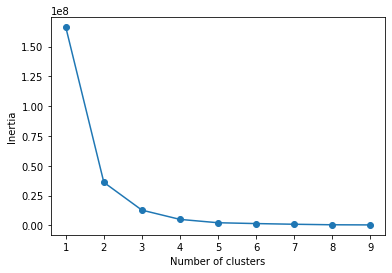

In [51]:
X = df.drop(['state'],axis=1).values
criterion_functions = []

for i in range(1, 10):
    km = KMeans(
        n_clusters=i, random_state=42
    )
    km.fit(X)
    criterion_functions.append(km.inertia_)

# plot
plt.plot(range(1, 10), criterion_functions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

labels = kmeans.labels_
df['label']=labels
diz_cluster = {0:'cluster1',1:'cluster2',2:'cluster3',3:'cluster4'}
df['label_str'] = df['label'].apply(lambda x: diz_cluster[x])

In [53]:
labels

array([2, 3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [54]:
df.head()

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate,label,label_str
0,China,11576.0,35.000074,104.999927,1.000000,0.217809,0.877019,-0.428250,2,cluster3
1,United States,5833.0,39.783730,-100.445882,0.005713,-0.489732,-0.041768,0.870872,3,cluster4
3,India,3235.0,22.351115,78.667743,-0.444079,0.928261,0.119401,-0.352243,0,cluster1
4,Russia,2391.0,64.686314,97.745306,-0.590201,0.262333,0.097527,0.960036,0,cluster1
5,Japan,1264.0,36.574844,139.239418,-0.785319,0.229918,0.365542,-0.901952,1,cluster2


In [55]:
df[df.label==0]

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate,label,label_str
3,India,3235.0,22.351115,78.667743,-0.444079,0.928261,0.119401,-0.352243,0,cluster1
4,Russia,2391.0,64.686314,97.745306,-0.590201,0.262333,0.097527,0.960036,0,cluster1
8,Indonesia,2229.0,-2.483383,117.890285,-0.618248,-0.063662,0.788523,-0.611702,0,cluster1


In [56]:
df[df.label==1]

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate,label,label_str
5,Japan,1264.0,36.574844,139.239418,-0.785319,0.229918,0.365542,-0.901952,1,cluster2
6,Brazil,1379.0,-10.333333,-53.200000,-0.765409,0.601750,0.126419,0.788616,1,cluster2
7,Germany,809.0,51.083420,10.423447,-0.864093,-0.370185,-0.574845,0.729737,1,cluster2
9,Canada,779.0,61.066692,-107.991707,-0.869287,-0.074009,0.178401,-0.981171,1,cluster2
10,Mexico,688.0,22.500048,-100.000038,-0.885042,-0.753063,-0.442171,-0.487217,1,cluster2
11,Iran,868.0,32.647531,54.564352,-0.853878,-0.133700,-0.304680,0.943024,1,cluster2
12,South Korea,657.0,36.638392,127.696119,-0.890409,-0.217462,0.437141,-0.872707,1,cluster2
13,Australia,519.0,-24.776109,134.755000,-0.914301,-0.885452,0.306740,0.349121,1,cluster2
14,Saudi Arabia,664.0,25.624262,42.352833,-0.889197,-0.051693,-0.880099,0.471967,1,cluster2
15,United Kingdom,462.0,54.702354,-3.276575,-0.924169,0.269570,-0.036610,-0.962285,1,cluster2


In [57]:
df[df.label==2]

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate,label,label_str
0,China,11576.0,35.000074,104.999927,1.0,0.217809,0.877019,-0.42825,2,cluster3


In [58]:
df[df.label==3]

,state,production_based_emissions,latitude,longitude,production_based_emissions_scal,x_coordinate,y_coordinate,z_coordinate,label,label_str
1,United States,5833.0,39.78373,-100.445882,0.005713,-0.489732,-0.041768,0.870872,3,cluster4


In [59]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [60]:
import plotly.express as px
import plotly.graph_objects as go

In [61]:
df.z_coordinate.describe()

count    53.000000
mean      0.119396
std       0.701668
min      -0.989791
25%      -0.609843
50%       0.305591
75%       0.729737
max       0.998423
Name: z_coordinate, dtype: float64

In [62]:
fig = px.histogram(df, x='label',  histfunc='count', height=700,color='state'
                    ,title='Count of countries for each cluster')
fig.show()

In [63]:
fig = px.scatter_3d(df, x="latitude", y="longitude", z="production_based_emissions", 
                    color="label_str")
fig.show()

In [64]:
fig = px.scatter_3d(df, x="latitude", y="longitude", z="production_based_emissions", 
                    color="label_str",symbol='state', opacity=0.8)
fig.show()

In [65]:
df.columns

Index(['state', 'production_based_emissions', 'latitude', 'longitude',
       'production_based_emissions_scal', 'x_coordinate', 'y_coordinate',
       'z_coordinate', 'label', 'label_str'],
      dtype='object')

In [66]:
fig = px.scatter_geo(df,  color="label_str", 
                     hover_name="state", size="production_based_emissions",
                     projection="natural earth",lat="latitude",lon="longitude")
fig.show()